# Data Info
-  비플라이소프트㈜는 그 동안 부족했던 한국어로 된 문서요약 텍스트 데이터의 축적 및 활용을 위하여 총 40만 건의 한국어 데이터셋을 구축하였으며 해당 데이터셋은 뉴스기사, 기고문, 법률 판결문, 잡지 등 다양한 도메인으로 구성되어 요약 AI 알고리즘화 성능 향상을 추구하였다.
- 문서요약 텍스트 데이터셋은 원문데이터에 대한 추출요약과 생성요약으로 구성되며, 즉 하나의 데이터셋에 총 3건의 데이터 (원문, 추출, 생성)가 포함된다. 
- 원문데이터의 수량은 **뉴스기사 30만 건**, 기고문 6만 건, 잡지 1만 건, 법원 판결문 3만 건으로 총 40만 건이며, 이에 대한 추출요약과 생성요약도 각각 40만 건 씩 구축되었다.
- 뉴스기사는 요약 AI 알고리즘의 핵심 데이터로서 10개 언론사로부터 30만 건의 원문데이터를 확보하였으며, 이 중 종합면 30%, 정치 20%, 경제 20%, 사회 20%, 문화 및 스포츠 기타 10%의 비율로 구성되어 있다.
- **추출요약**은 원문의 형태적 구조를 바탕으로 내용을 잘 표현하는 문장 3개 (리드문 포함)를 추출하여 우선순위에 따라 차례로 작성했으며 
- **생성요약**은 추출요약으로 형성된 문장, 제목의 키워드, 동의어 등을 활용하여 기사의 내용을 한 문장으로 요약했다.

# JSON to CSV

In [1]:
# import os
# import csv
# import json


# input_file_name = os.getenv('HOME')+'/aiffel/aeumgil/data/train_original.json'
# output_file_name = os.getenv('HOME')+'/aiffel/aeumgil/data/train_original.csv'
# with open(input_file_name, "r", encoding="utf-8", newline="") as input_file, \
#         open(output_file_name, "w", encoding="utf-8", newline="") as output_file:
#     json_data = json.load(input_file)
#     documents = json_data['documents']
    
#     data = []
#     columns = list(documents[0].keys())
#     data.append(columns)
#     for i in documents:
#         values = list(i.values())
#         data.append(values)
    
#     csvwriter = csv.writer(output_file)
#     csvwriter.writerow(data[0])
#     for line in data:
#         csvwriter.writerow(line)
#     input_file.close()
#     output_file.close()

# Data EDA

In [2]:
import os
import csv
import pandas as pd

output_file_name = os.getenv('HOME')+'/aiffel/aeumgil/data/train_original.csv'
news = pd.read_csv(output_file_name)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,6,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
news = news.drop(news.index[0])
news.head()

,id,category,media_type,media_sub_type,media_name,size,char_count,publish_date,title,text,annotator_id,document_quality_scores,extractive,abstractive
1,290741778,종합,online,지역지,광양신문,small,927,2018-01-05 18:54:55,"논 타작물 재배, 2월 말까지 신청하세요","[[{'index': 0, 'sentence': 'ha당 조사료 400만원…작물별 ...",11,"{'readable': 4, 'accurate': 3, 'informative': ...","[2, 3, 10]","[""전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼..."
2,290741792,종합,online,지역지,광양신문,small,764,2018-01-05 18:53:20,"여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성","[[{'index': 0, 'sentence': '8억 투입, 고소천사벽화·자산마을...",12,"{'readable': 4, 'accurate': 4, 'informative': ...","[2, 4, 11]",['여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소...
3,290741793,스포츠,online,지역지,광양신문,medium,1066,2018-01-05 18:52:15,“새해 정기 받고 올해는 반드시 일내자!”,"[[{'index': 0, 'sentence': '전남드래곤즈 해맞이 다짐…선수 영...",13,"{'readable': 4, 'accurate': 4, 'informative': ...","[3, 5, 7]",['전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 ...
4,290741794,정치,online,지역지,광양신문,small,746,2018-01-05 18:50:17,"농업인 역량 강화, 새해 실용교육 실시","[[{'index': 0, 'sentence': '11~24일, 매실·감·참다래 등...",12,"{'readable': 4, 'accurate': 4, 'informative': ...","[2, 3, 4]","['광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특..."
5,290741797,종합,online,지역지,광양신문,small,978,2018-01-05 18:52:36,타이완 크루즈관광객 4천여명‘전남’온다,"[[{'index': 0, 'sentence': '홍콩 크루즈선사‘아쿠아리우스’ 4...",13,"{'readable': 4, 'accurate': 4, 'informative': ...","[3, 7, 4]",['올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 ...


In [4]:
news.isnull().any()

id                         False
category                   False
media_type                 False
media_sub_type             False
media_name                 False
size                       False
char_count                 False
publish_date               False
title                      False
text                       False
annotator_id               False
document_quality_scores    False
extractive                 False
abstractive                False
dtype: bool

In [5]:
news['text'][1]

"[[{'index': 0, 'sentence': 'ha당 조사료 400만원…작물별 차등 지원', 'highlight_indices': ''}], [{'index': 1, 'sentence': '이성훈 sinawi@hanmail.net', 'highlight_indices': ''}], [{'index': 2, 'sentence': '전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다.', 'highlight_indices': ''}], [{'index': 3, 'sentence': '쌀 생산조정제는 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 제도다.', 'highlight_indices': '35,37'}], [{'index': 4, 'sentence': '올해 전남의 논 다른 작물 재배 계획면적은 전국 5만ha의 약 21%인 1만 698ha로, 세부시행지침을 확정, 시군에 통보했다.', 'highlight_indices': '9,11;33,34'}, {'index': 5, 'sentence': '지원사업 대상은 2017년산 쌀 변동직불금을 받은 농지에 10a(300평) 이상 벼 이외 다른 작물을 재배한 농업인이다.', 'highlight_indices': '50,52'}], [{'index': 6, 'sentence': '지원 대상 작물은 1년생을 포함한 다년생의 모든 작물이 해당되나 재배 면적 확대 시 수급과잉이 우려되는 고추, 무, 배추, 인삼, 대파 등 수급 불안 품목은 제외된다.', 'highlight_indices': '24,26'}], [{'index': 7, 'sentence': '농지의 경우도 이미 다른 작물 재배 의무가 부여된 간척지, 정부매입비축농지, 농진청 시범사업, 경관보전 직불금 수령 농지 등은 제외될 예정이다.', 'highlight_indices': '8,10;11,13'}], [{'index': 8, 'sentence': 

In [6]:
import ast

exts = []
txt = ast.literal_eval(news['text'][1])
ext = ast.literal_eval(news.extractive[1])
for i in txt :
    if i[0]['index'] in list(ext):
        exts.append(i[0]['sentence'])

In [7]:
exts

['전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다.',
 '쌀 생산조정제는 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 제도다.',
 '논에 다른 작물 재배를 바라는 농가는 오는 22일부터 2월 28일까지 농지 소재지 읍면동사무소에 신청해야 한다.']

In [8]:
list(ast.literal_eval(news['abstractive'][1]))

["전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 '쌀 생산조정제'를 적극적으로 시행하기로 하고 오는 22일부터 2월 28일까지 농지 소재지 읍면동사무소에서 신청받는다 ."]

In [9]:
txt = ast.literal_eval(news['extractive'][1])
txt


[2, 3, 10]

In [10]:
txt = ast.literal_eval(news['text'][1])
txt

[[{'index': 0,
   'sentence': 'ha당 조사료 400만원…작물별 차등 지원',
   'highlight_indices': ''}],
 [{'index': 1, 'sentence': '이성훈 sinawi@hanmail.net', 'highlight_indices': ''}],
 [{'index': 2,
   'sentence': '전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다.',
   'highlight_indices': ''}],
 [{'index': 3,
   'sentence': '쌀 생산조정제는 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 제도다.',
   'highlight_indices': '35,37'}],
 [{'index': 4,
   'sentence': '올해 전남의 논 다른 작물 재배 계획면적은 전국 5만ha의 약 21%인 1만 698ha로, 세부시행지침을 확정, 시군에 통보했다.',
   'highlight_indices': '9,11;33,34'},
  {'index': 5,
   'sentence': '지원사업 대상은 2017년산 쌀 변동직불금을 받은 농지에 10a(300평) 이상 벼 이외 다른 작물을 재배한 농업인이다.',
   'highlight_indices': '50,52'}],
 [{'index': 6,
   'sentence': '지원 대상 작물은 1년생을 포함한 다년생의 모든 작물이 해당되나 재배 면적 확대 시 수급과잉이 우려되는 고추, 무, 배추, 인삼, 대파 등 수급 불안 품목은 제외된다.',
   'highlight_indices': '24,26'}],
 [{'index': 7,
   'sentence': '농지의 경우도 이미 다른 작물 재배 의무가 부여된 간척지, 정부매입비축농지, 농진청 시범사업, 경관보전 직불금 수령 농지 등은 제외될 예정이다.',
   'highlight_ind

In [11]:
news['text'][1]

"[[{'index': 0, 'sentence': 'ha당 조사료 400만원…작물별 차등 지원', 'highlight_indices': ''}], [{'index': 1, 'sentence': '이성훈 sinawi@hanmail.net', 'highlight_indices': ''}], [{'index': 2, 'sentence': '전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다.', 'highlight_indices': ''}], [{'index': 3, 'sentence': '쌀 생산조정제는 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 제도다.', 'highlight_indices': '35,37'}], [{'index': 4, 'sentence': '올해 전남의 논 다른 작물 재배 계획면적은 전국 5만ha의 약 21%인 1만 698ha로, 세부시행지침을 확정, 시군에 통보했다.', 'highlight_indices': '9,11;33,34'}, {'index': 5, 'sentence': '지원사업 대상은 2017년산 쌀 변동직불금을 받은 농지에 10a(300평) 이상 벼 이외 다른 작물을 재배한 농업인이다.', 'highlight_indices': '50,52'}], [{'index': 6, 'sentence': '지원 대상 작물은 1년생을 포함한 다년생의 모든 작물이 해당되나 재배 면적 확대 시 수급과잉이 우려되는 고추, 무, 배추, 인삼, 대파 등 수급 불안 품목은 제외된다.', 'highlight_indices': '24,26'}], [{'index': 7, 'sentence': '농지의 경우도 이미 다른 작물 재배 의무가 부여된 간척지, 정부매입비축농지, 농진청 시범사업, 경관보전 직불금 수령 농지 등은 제외될 예정이다.', 'highlight_indices': '8,10;11,13'}], [{'index': 8, 'sentence': 

In [12]:
def extract_sen(txt, ext):
    '''
    extractive 컬럼에 mapping하여 추출요약문 리스트를 반환하는 함수입니다.
    '''
    exts = []
    txt = ast.literal_eval(txt)
    ext = ast.literal_eval(ext)
    for i in txt :
        for j in (i):
            if j['index'] in list(ext): 
                exts.append(j['sentence'])
    return exts

def abstract_sen(x):
    '''
    abstractive 컬럼에 mapping하여 생성요약문을 추출하는 반환하는 함수입니다.
    '''
    abst = list(ast.literal_eval(x))
    return abst

def origin(x):
    '''
    text 컬럼에 mapping하여 원문을 반환하는 함수입니다.
    '''
    origin_txt = []
    txt = ast.literal_eval(x)
    for i in txt :
        for j in (i):
            origin_txt.append(j['sentence'])
    return origin_txt

def score(x):
    '''
    document_quality_scores 컬럼에 mapping하여 readable, accurate, informative, trustworthy 를 반환하는 함수입니다.
    '''
    score = ast.literal_eval(x)
    return score['readable'], score['accurate'], score['informative'], score['trustworthy']

def publish_date(x):
    '''
    publish_date 컬럼에 mapping하여 year, month, date 을 반환하는 함수입니다. 
    '''
    tmp = x.split()[0].split('-')
    year = tmp[0]; month = tmp[1]; date = tmp[2]
    return year, month, date

In [13]:
news['ext_sum'] = news.apply(lambda x : extract_sen(x['text'],x['extractive']), axis=1 )

In [15]:
news['abs_sum'] = news['abstractive'].map(lambda x : abstract_sen(x))

In [16]:
news['origin'] = news['text'].map(lambda x : origin(x))

In [17]:
news['readable'] = news['document_quality_scores'].map(lambda x : score(x)[0])
news['accurate'] = news['document_quality_scores'].map(lambda x : score(x)[1])
news['informative'] = news['document_quality_scores'].map(lambda x : score(x)[2])
news['trustworthy'] = news['document_quality_scores'].map(lambda x : score(x)[3])

In [18]:
news['year'] = news['publish_date'].map(lambda x : publish_date(x)[0])
news['month'] = news['publish_date'].map(lambda x : publish_date(x)[1])
news['date'] = news['publish_date'].map(lambda x : publish_date(x)[2])

## Types of Features

### Categorical Feautures
- 'category' : 신문 기사의 주제 분류
- 'media_name' : 신문 매체의 이름 분류

### Ordinal Features
- 'size' : char_count에 따른 기사 크기 분류 (small, medium, big)
- 'readable' : 가독성에 따른 순서분류 (1-4)
- 'accurate' : 정확성에 따른 순서분류 (1-4)
- 'informative' : 정보량에 따른 순서분류 (1-4)
- 'trustworthy' : 신뢰성에 따른 순서분류 (1-4)

### Continuous Features
- 'year', 'month', 'date' : 년, 월, 시

In [19]:
news.head()

,id,category,media_type,media_sub_type,media_name,size,char_count,publish_date,title,text,...,ext_sum,abs_sum,origin,readable,accurate,informative,trustworthy,year,month,date
1,290741778,종합,online,지역지,광양신문,small,927,2018-01-05 18:54:55,"논 타작물 재배, 2월 말까지 신청하세요","[[{'index': 0, 'sentence': 'ha당 조사료 400만원…작물별 ...",...,[전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제...,[전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 ...,"[ha당 조사료 400만원…작물별 차등 지원, 이성훈 sinawi@hanmail.n...",4,3,3,3,2018,01,05
2,290741792,종합,online,지역지,광양신문,small,764,2018-01-05 18:53:20,"여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성","[[{'index': 0, 'sentence': '8억 투입, 고소천사벽화·자산마을...",...,[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...,"[8억 투입, 고소천사벽화·자산마을에 색채 입혀, 이성훈 sinawi@hanmail...",4,4,5,4,2018,01,05
3,290741793,스포츠,online,지역지,광양신문,medium,1066,2018-01-05 18:52:15,“새해 정기 받고 올해는 반드시 일내자!”,"[[{'index': 0, 'sentence': '전남드래곤즈 해맞이 다짐…선수 영...",...,[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,"[전남드래곤즈 해맞이 다짐…선수 영입 활발, 이성훈 sinawi@hanmail.ne...",4,4,4,4,2018,01,05
4,290741794,정치,online,지역지,광양신문,small,746,2018-01-05 18:50:17,"농업인 역량 강화, 새해 실용교육 실시","[[{'index': 0, 'sentence': '11~24일, 매실·감·참다래 등...",...,[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...","[11~24일, 매실·감·참다래 등 지역특화작목, 이성훈 sinawi@hanmail...",4,4,5,4,2018,01,05
5,290741797,종합,online,지역지,광양신문,small,978,2018-01-05 18:52:36,타이완 크루즈관광객 4천여명‘전남’온다,"[[{'index': 0, 'sentence': '홍콩 크루즈선사‘아쿠아리우스’ 4...",...,[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,"[홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항, 이성훈 sinawi@han...",4,4,4,4,2018,01,05


In [20]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

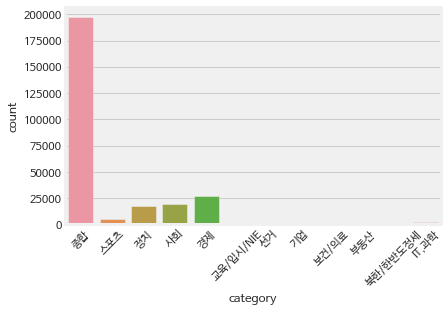

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.countplot(x="category", data=news)
sns.set(rc = {'figure.figsize':(10,8)})
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(rotation=45)

plt.show()

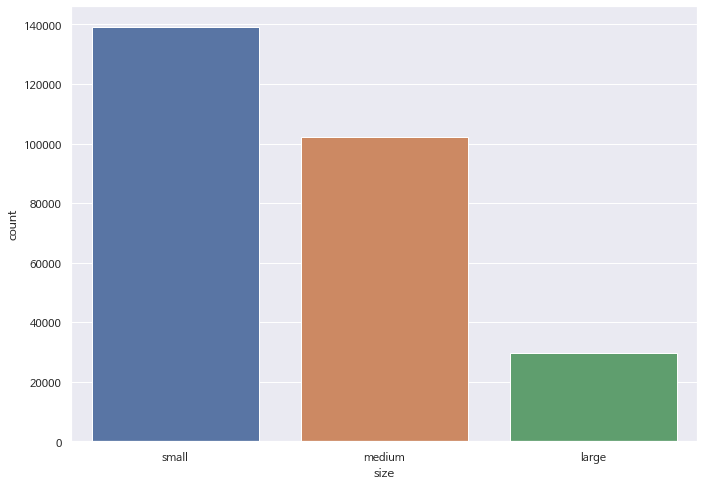

In [22]:
sns.countplot(x="size", data=news)
sns.set(rc = {'figure.figsize':(5,4)})
# plt.xticks(rotation=45)
plt.rc('font', family='NanumBarunGothic') 

plt.show()

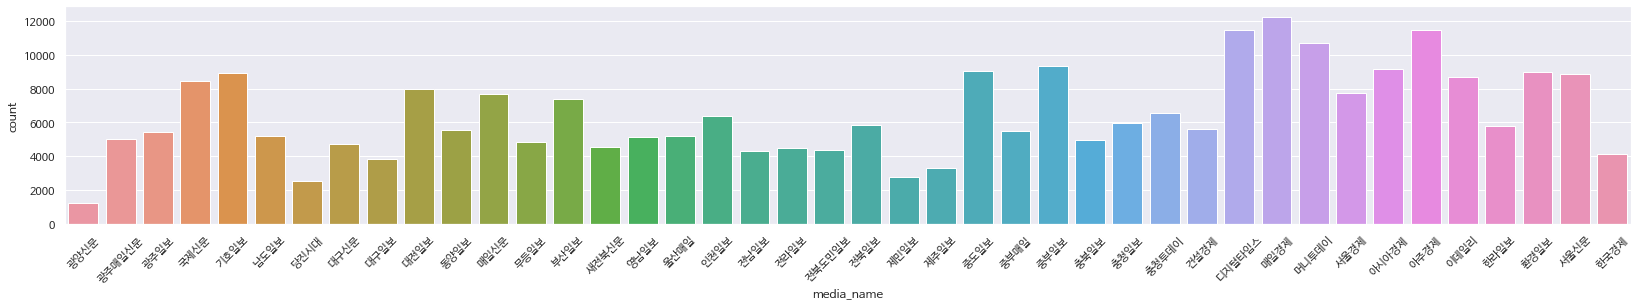

In [26]:
sns.countplot(x="media_name", data=news)
sns.set(rc = {'figure.figsize':(25,4)})
plt.xticks(rotation=45)
plt.rc('font', family='NanumBarunGothic') 

plt.show()

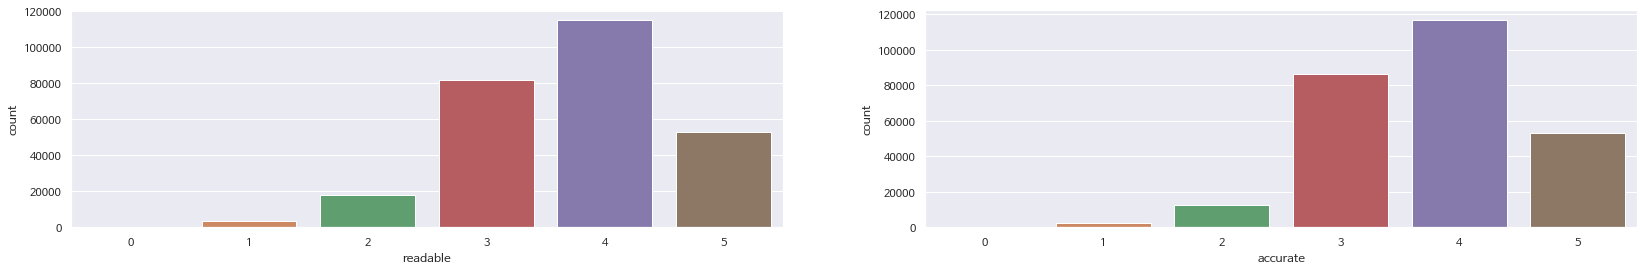

In [27]:
fig, ax = plt.subplots(ncols=2)

sns.countplot(x="readable", data=news, ax=ax[0])
sns.countplot(x="accurate", data=news, ax=ax[1])

sns.set(rc = {'figure.figsize':(20,5)})
# plt.xticks(rotation=45)
plt.rc('font', family='NanumBarunGothic') 

# plt.show()

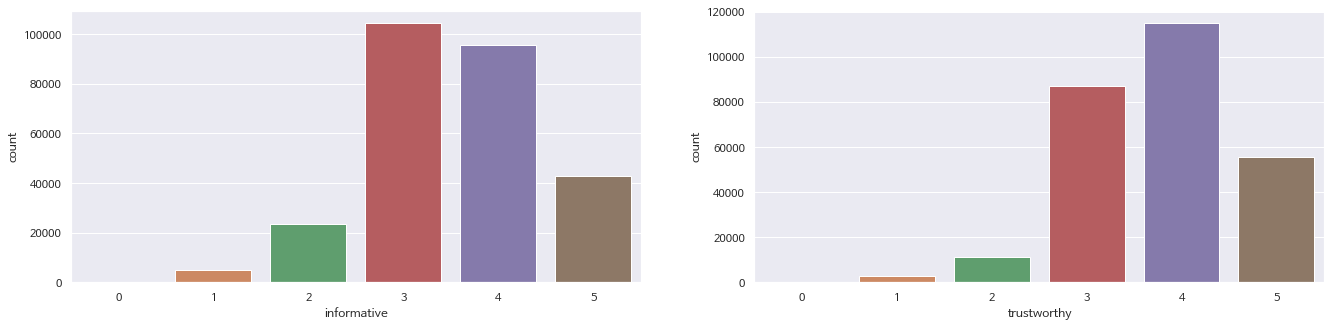

In [28]:
fig, ax = plt.subplots(ncols=2)

sns.countplot(x="informative", data=news,ax=ax[0])
sns.countplot(x="trustworthy", data=news, ax=ax[1])

sns.set(rc = {'figure.figsize':(20,5)})

plt.rc('font', family='NanumBarunGothic') 

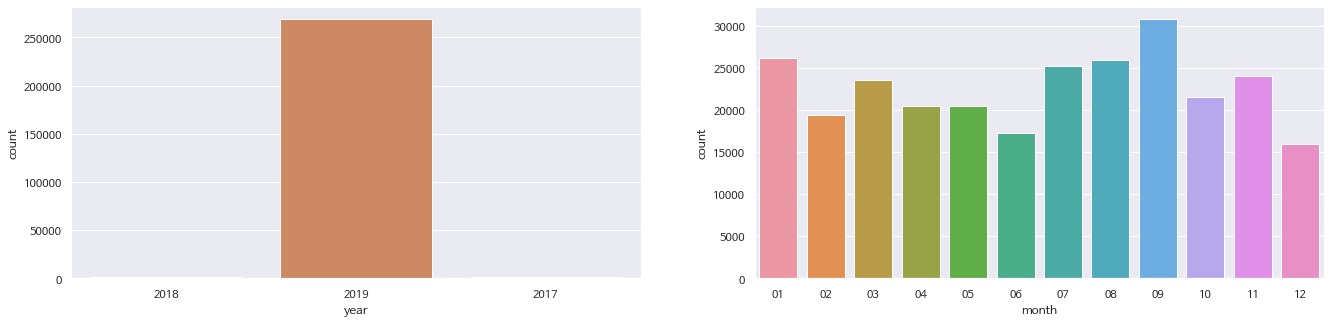

In [29]:
fig, ax = plt.subplots(ncols=2)

sns.countplot(x="year", data=news,ax=ax[0])
sns.countplot(x="month", data=news, ax=ax[1])

sns.set(rc = {'figure.figsize':(20,5)})

plt.rc('font', family='NanumBarunGothic') 

In [30]:
df = news[['category','media_name','title','origin','ext_sum','abs_sum','size','char_count','year','month','date','readable','accurate','informative','trustworthy']]
df.head()

,category,media_name,title,origin,ext_sum,abs_sum,size,char_count,year,month,date,readable,accurate,informative,trustworthy
1,종합,광양신문,"논 타작물 재배, 2월 말까지 신청하세요","[ha당 조사료 400만원…작물별 차등 지원, 이성훈 sinawi@hanmail.n...",[전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제...,[전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 ...,small,927,2018,01,05,4,3,3,3
2,종합,광양신문,"여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성","[8억 투입, 고소천사벽화·자산마을에 색채 입혀, 이성훈 sinawi@hanmail...",[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...,small,764,2018,01,05,4,4,5,4
3,스포츠,광양신문,“새해 정기 받고 올해는 반드시 일내자!”,"[전남드래곤즈 해맞이 다짐…선수 영입 활발, 이성훈 sinawi@hanmail.ne...",[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,medium,1066,2018,01,05,4,4,4,4
4,정치,광양신문,"농업인 역량 강화, 새해 실용교육 실시","[11~24일, 매실·감·참다래 등 지역특화작목, 이성훈 sinawi@hanmail...",[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...",small,746,2018,01,05,4,4,5,4
5,종합,광양신문,타이완 크루즈관광객 4천여명‘전남’온다,"[홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항, 이성훈 sinawi@han...",[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,small,978,2018,01,05,4,4,4,4


In [31]:
print(df[df['size']=='small']['char_count'].astype(int).mean()) #- size small의 평균 char_count : 833
print(df[df['size']=='medium']['char_count'].astype(int).mean()) #- size medium의 평균 char_count : 1204
print(df[df['size']=='large']['char_count'].astype(int).mean()) #- size large의 평균 char_count : 1694

832.5040148372859
1204.2265018739786
1693.9704648430945


In [32]:
df.describe()

,readable,accurate,informative,trustworthy
count,271093.000000,271093.000000,271093.000000,271093.000000
mean,3.722745,3.759994,3.546831,3.770592
std,0.893117,0.849028,0.919150,0.854285
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [33]:
df.isnull().sum()

category       0
media_name     0
title          0
origin         0
ext_sum        0
abs_sum        0
size           0
char_count     0
year           0
month          0
date           0
readable       0
accurate       0
informative    0
trustworthy    0
dtype: int64

## document_quality_scores

<AxesSubplot:ylabel='Density'>

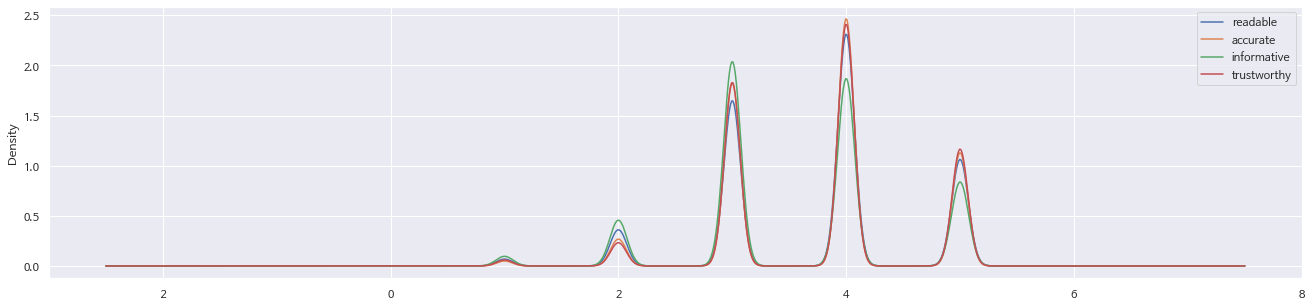

In [34]:
df[['readable','accurate','informative','trustworthy']].plot(kind='kde')

In [44]:
tmp = df[df['readable'] == 5].reset_index()
tmp.shape

(52832, 16)

In [35]:
#- 가독성 4점 이상 (약 16만7천개)
tmp = df[df['readable'] >= 4].reset_index()
tmp.shape

cnt = 0
for i in range(0,tmp.shape[0],100):
    cnt += 1
    print(f"원문:\n{tmp['origin'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}")
    if cnt > 5:
        break

원문:
['ha당 조사료 400만원…작물별 차등 지원', '이성훈 sinawi@hanmail.net', '전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다.', '쌀 생산조정제는 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 제도다.', '올해 전남의 논 다른 작물 재배 계획면적은 전국 5만ha의 약 21%인 1만 698ha로, 세부시행지침을 확정, 시군에 통보했다.', '지원사업 대상은 2017년산 쌀 변동직불금을 받은 농지에 10a(300평) 이상 벼 이외 다른 작물을 재배한 농업인이다.', '지원 대상 작물은 1년생을 포함한 다년생의 모든 작물이 해당되나 재배 면적 확대 시 수급과잉이 우려되는 고추, 무, 배추, 인삼, 대파 등 수급 불안 품목은 제외된다.', '농지의 경우도 이미 다른 작물 재배 의무가 부여된 간척지, 정부매입비축농지, 농진청 시범사업, 경관보전 직불금 수령 농지 등은 제외될 예정이다.', 'ha(3000평)당 지원 단가는 평균 340만원으로 사료작물 400만원, 일반작물은 340만원, 콩·팥 등 두류작물은 280만원 등이다.', '벼와 소득차와 영농 편이성을 감안해 작물별로 차등 지원된다.', '논에 다른 작물 재배를 바라는 농가는 오는 22일부터 2월 28일까지 농지 소재지 읍면동사무소에 신청해야 한다.', '전남도는 도와 시군에 관련 기관과 농가 등이 참여하는‘논 타작물 지원사업 추진협의회’를 구성, 지역 특성에 맞는 작목 선정 및 사업 심의 등을 본격 추진할 방침이다.', '최향철 전라남도 친환경농업과장은 “최근 쌀값이 다소 상승추세에 있으나 매년 공급과잉에 따른 가격 하락으로 쌀농가에 어려움이 있었다”며“쌀 공급과잉을 구조적으로 해결하도록 논 타작물 재배 지원사업에 많이 참여해주길 바란다”고 말했다.']

추출요약:
['전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다.'

In [36]:
#- 가독성 1점 (약 3천4백개)
tmp = df[df['readable'] == 1].reset_index()
print(tmp.shape)

cnt = 0
for i in range(0,tmp.shape[0],100):
    cnt += 1
    print(f"원문:\n{tmp['origin'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}")
    if cnt > 5:
        break

(3388, 16)
원문:
['이성훈 sinawi@hanmail.net', '광양시가 취업준비생과 사회초년생, 독신근로자의 주거비 부담을 덜어주는 청년주택자금 대출이자 지원 사업을 오는 16일부터 접수 받는다.', '기초 자치단체에서는 최초로 시행하는 이번 사업은‘청년희망 행복광양’기본계획의 하나다.', '시는 지난해 청년실태 조사에서 나타난 경제적으로 취약한 취업준비생 등을 대상으로 주거생활 안정을 도모하고, 청년들의 사회적응과 정착 지원을 위해 마련됐다.', '신청대상은 주거전용면적이 85㎡ 이하의 공동주택과 단독주택이다.', '구입자금으로는 주택가격은 3억원 이하, 전세자금은 2억원 이하의 주택 또는 주거용 오피스텔로, 광양시에 주소를 둔 만 19~39세 이하 무주택 세대주인 청년이면 가능하다.', '자격 요건으로는‘취업준비생’은 미혼자이면서 무소득·무주택 세대주로서 부모 합산 연소득 6000만원 이하다.', '‘사회초년생’은 첫 취업 후 5년 이내의 무주택 세대주로서 본인 연소득 4000만원 이하이거나 부부합산 연소득 7000만원 이하면 신청할 수 있다.', '‘독신근로자’는 취업 후 5년 이상 근로한 관내 거주 독신근로자인 무주택 세대주로서 본인 연소득 5000만원 이하인 청년이면 신청이 가능하다.', '신청은 오는 16일부터 2월 2일까지 신청서와 관련서류 등을 지참해 시청 전략정책담당관실로 방문해 접수하면 된다.', '접수된 서류는 시에서 청년주택 자금대출 이자지원 대상자를 적격여부인지를 심사해 대상여부를 통보하며, 신청자는 신한은행을 방문해 대출 신청을 하면 된다.', '대출 심사 결과 이차보전 대상자로 최종 선정될 경우 이자율 최대 3%로 구입자금은 연 300만원까지 3년간, 전세자금은 연 150만원까지 2년간 지원받을 수 있게 된다.', '특히, 대출이자 지원 기한을 연장할 경우에는 청년주택 구입자금으로 5년간 최대 1500만원, 전세자금 이자지원으로는 4년간 최대 600만원까지 지원받을 수 있다.', '윤영학 전략정책담당관은“이번 지원사업이

In [37]:
#- 모든 스코어 4점 이상 (약 10만4천개)
tmp = df[(df['readable'] >= 4) & (df['accurate'] >= 4) & (df['informative'] >= 4) & (df['trustworthy'] >= 4)].reset_index()
print(tmp.shape)

cnt = 0
for i in range(0,tmp.shape[0],100):
    cnt += 1
    print(f"원문:\n{tmp['origin'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}")
    if cnt > 5:
        break

(104355, 16)
원문:
['8억 투입, 고소천사벽화·자산마을에 색채 입혀', '이성훈 sinawi@hanmail.net', '여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의 도시를 완성했다.', '시에 따르면 총 사업비 8억원이 투입된 컬러빌리지 사업은‘낮에는 색채, 밤에는 빛’을 주제로 지난해 초 착공에 들어갔다.', '컬러빌리지는 색채를 이용한 경관개선사업으로 사업완료에 따라 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었다.', '특히 자산마을 주택 70여 동은 동백꽃 색으로 새 단장을 마쳤다.', '마을 옆을 지나는 해상케이블카에서 내려다보면 동백꽃 한 송이가 피어있는 모습으로 SNS 등을 통해 입소문을 타고 있다.', '고소천사벽화마을 주택 130여 동도 지붕은 동백꽃 색, 벽면은 파스텔 톤 색상으로 변신해 이국적인 분위기를 내고 있다.', '마을 내 옹벽과 비탈면은 패턴벽화와 야간조명이 설치돼 포토존으로 인기를 끌고 있다.', '컬러빌리지 사업은 추진 전반에 마을 주민이 적극 참여했다는 점에서 좋은 평가를 받고 있다.', '시는 사업대상이 사유시설인 만큼 계획단계부터 주민들의 의견을 들었다.', '사업 시행과 준공 과정에서도 주민들의 참여를 유도해 민관이 함께 만들어가는 경관사업의 좋은 사례를 만들었다.', '시 관계자는“컬러빌리지 사업은 주민들의 적극적인 관심과 참여가 만들어낸 값진 성과물”이라며“돌산공원, 해상케이블카, 남산공원, 돌산대교 등에서 빛과 색채로 물들어가는 여수의 낭만을 만끽하시기 바란다”고 말했다.']

추출요약:
['여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의 도시를 완성했다.', '컬러빌리지는 색채를 이용한 경관개선사업으로 사업완료에 따라 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었다.', '사업 시행과 준공 과정에서도 주민들의 참여를 유도해 민관이 함께 만들어가는 경관사업의 좋은 사례를 만들었다.']

생성요약
['여수시는 컬러빌리

In [38]:
tmp.head()

,index,category,media_name,title,origin,ext_sum,abs_sum,size,char_count,year,month,date,readable,accurate,informative,trustworthy
0,2,종합,광양신문,"여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성","[8억 투입, 고소천사벽화·자산마을에 색채 입혀, 이성훈 sinawi@hanmail...",[여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛...,[여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천...,small,764,2018,01,05,4,4,5,4
1,3,스포츠,광양신문,“새해 정기 받고 올해는 반드시 일내자!”,"[전남드래곤즈 해맞이 다짐…선수 영입 활발, 이성훈 sinawi@hanmail.ne...",[임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표...,[전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구...,medium,1066,2018,01,05,4,4,4,4
2,4,정치,광양신문,"농업인 역량 강화, 새해 실용교육 실시","[11~24일, 매실·감·참다래 등 지역특화작목, 이성훈 sinawi@hanmail...",[광양시는 오는 11일부터 24일까지 농업인교육관과 읍면동 회의실에서 농업인 105...,"[광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화...",small,746,2018,01,05,4,4,5,4
3,5,종합,광양신문,타이완 크루즈관광객 4천여명‘전남’온다,"[홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항, 이성훈 sinawi@han...",[전라남도는 올해 4월과 6월 홍콩 크루즈선사 스타크루즈의 5만톤급‘아쿠아리우스’호...,[올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입...,small,978,2018,01,05,4,4,4,4
4,6,정치,광양신문,"읍면동 주민센터, 일자리 안정자금 접수","[30인 미만 중소기업 등 사업주에 월 13만원 지급, 이성훈 sinawi@hanm...",[광양시는 정부가 2018년 1월 1일부터 시행하는 일자리 안정자금 신청을 12개 ...,[광양시는 30인 미만 중소기업 등 사업주에 1인당 월 13만원씩 지급하는 일자리 ...,small,953,2018,01,05,4,4,5,4


In [39]:
#- 모든 score 4 이상인 데이터 
df_filtered = tmp

## size
- 모든 score 4 이상 & size small & char_count 평균 833 : 약 5만 4천개

In [40]:
#- size small 약 5만 4천 개 
tmp = df_filtered[df_filtered['size'] == 'small'].reset_index()
print(tmp.shape)

cnt = 0
for i in range(0,tmp.shape[0],100):
    cnt += 1
    print(f"원문:\n{tmp['origin'][i]}\n\n글자수:{tmp['char_count'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}")
    if cnt > 5:
        break

(54073, 17)
원문:
['8억 투입, 고소천사벽화·자산마을에 색채 입혀', '이성훈 sinawi@hanmail.net', '여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의 도시를 완성했다.', '시에 따르면 총 사업비 8억원이 투입된 컬러빌리지 사업은‘낮에는 색채, 밤에는 빛’을 주제로 지난해 초 착공에 들어갔다.', '컬러빌리지는 색채를 이용한 경관개선사업으로 사업완료에 따라 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었다.', '특히 자산마을 주택 70여 동은 동백꽃 색으로 새 단장을 마쳤다.', '마을 옆을 지나는 해상케이블카에서 내려다보면 동백꽃 한 송이가 피어있는 모습으로 SNS 등을 통해 입소문을 타고 있다.', '고소천사벽화마을 주택 130여 동도 지붕은 동백꽃 색, 벽면은 파스텔 톤 색상으로 변신해 이국적인 분위기를 내고 있다.', '마을 내 옹벽과 비탈면은 패턴벽화와 야간조명이 설치돼 포토존으로 인기를 끌고 있다.', '컬러빌리지 사업은 추진 전반에 마을 주민이 적극 참여했다는 점에서 좋은 평가를 받고 있다.', '시는 사업대상이 사유시설인 만큼 계획단계부터 주민들의 의견을 들었다.', '사업 시행과 준공 과정에서도 주민들의 참여를 유도해 민관이 함께 만들어가는 경관사업의 좋은 사례를 만들었다.', '시 관계자는“컬러빌리지 사업은 주민들의 적극적인 관심과 참여가 만들어낸 값진 성과물”이라며“돌산공원, 해상케이블카, 남산공원, 돌산대교 등에서 빛과 색채로 물들어가는 여수의 낭만을 만끽하시기 바란다”고 말했다.']

글자수:764

추출요약:
['여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의 도시를 완성했다.', '컬러빌리지는 색채를 이용한 경관개선사업으로 사업완료에 따라 고소천사벽화마을과 자산마을은 알록달록 색깔 옷을 입었다.', '사업 시행과 준공 과정에서도 주민들의 참여를 유도해 민관이 함께 만들어가는 경관사업의 좋은 사례를 만들었다.']

생성요약
['여

In [41]:
#- size medium ; 약 4만 개
tmp = df_filtered[df_filtered['size'] == 'medium'].reset_index()
print(tmp.shape)

cnt = 0
for i in range(0,tmp.shape[0],100):
    cnt += 1
    print(f"원문:\n{tmp['origin'][i]}\n\n글자수:{tmp['char_count'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}")
    if cnt > 5:
        break

(39218, 17)
원문:
['전남드래곤즈 해맞이 다짐…선수 영입 활발', '이성훈 sinawi@hanmail.net', '전남드래곤즈(사장 신승재)는 지난 4일 구봉산 해맞이 행사를 통해 새해 각오를 다졌다.', '임직원과 선수단 모두는 이날 구봉산 정상에 올라 일출을 보며 2018년 구단 목표를 달성하기 위한 결연한 의지를 다졌다.', '이번 해맞이 행사는 2018년을 시작하면서 떠오르는 해를 보며 전남드래곤즈 구성원 모두가 한마음 한 뜻으로 구단 목표 달성을 위해 정진하자는 의미에서 실시한 것이다.', '신승재 사장은“유상철 감독을 비롯한 코칭스텝, 선수단 구성이 마무리 된 만큼 구성원 모두가 하나되어 K리그 클래식 5위 이내 진입, FA컵 우승 등 ACL 진출권 획득을 목표로 최선을 다하자”고 선수들에게 신년 인사말을 전했다.', '유상철 감독은“구봉산의 정기를 받아 2018년을 전남드래곤즈의 해로 만들겠다”며 각오를 다졌다.', '한편 전남은 선수들도 추가 영입했다.', '우선 프렌차이즈 스타 김영욱과 2020년까지 연장계약을 했다.', '전남 유스 출신인 김영욱은 당초 계약기간이 1년 남아 있었지만, 전남의 프렌차이즈 스타로 팀의 중추적인 역할을 하고 있어 2020년까지 연장계약을 체결하게 됐다.', '전남은 이어 측면 공격력 강화를 위해 포항에서 활약한 완델손을 1년 임대 영입했다.', '완델손은 왼발 크로스가 정확하고 화려한 테크닉을 이용한 측면 공격력이 뛰어난 선수이다.', '또한 윙 포워드는 물론 공격형 미드필더, 측면 수비수로도 뛸 수 있는 멀티 플레이어다.', '공격력 강화를 위해 페체신 대체자로 중국 리그에서 활약한 하태균도 영입했다.', '하태균은2007년 드래프트 1순위로 수원 삼성에 입단해 K리그 신인상을 수상한 공격수로 2014년까지 K리그 통산 135경기 30골 7도움을 기록했다.', '2015년 중국으로 이적, 연변에서 26골을 기록 득점왕에 오르며 팀을 슈퍼리그로 승격시켰다.', '또한 2017년에는 바오딩으로 이적해 팀 

In [42]:
#- size large ; 약 1만 천개
tmp = df_filtered[df_filtered['size'] == 'large'].reset_index()
print(tmp.shape)

cnt = 0
for i in range(0,tmp.shape[0],100):
    cnt += 1
    print(f"원문:\n{tmp['origin'][i]}\n\n글자수:{tmp['char_count'][i]}\n\n추출요약:\n{tmp['ext_sum'][i]}\n\n생성요약\n{tmp['abs_sum'][i]}")
    if cnt > 5:
        break

(11064, 17)
원문:
['신년 기자간담회…개발 자제, 시민 행복 정책 초점', '이성훈 sinawi@hanmail.net', '광양시가 올해 개발 중심 시책에서 시민 삶의 질 향상에 초점을 두고 시정을 운영할 방침이다.', '민선 6기 정현복 시장은 지난 4년 동안 인프라 구축과 각종 개발에 중점을 뒀는데 올해 사업들을 살펴보면 오는 6월 민선 6기를 마무리하고 7기가 출범하는 올해 그동안 추진했던 개발 사업을 어느정도 마무리 짓고 7기로 이양하겠다는 목표가 뚜렷하다.', '시의 이같은 계획은 오는 6월 지방선거에 출마하는 정현복 시장이 재선 성공 여부를 떠나 일단 민선 6기에 추진했던 사업들은 하나둘씩 마무리하겠다는 것으로 풀이된다.', '정현복 시장은 지난 3일 시청 상황실에서 2018년 신년 기자간담회를 가졌다.', '간담회에는 민선6기 주요 성과와 올해 시정 핵심목표인‘아이가 행복하고 청년들이 꿈을 이루는 도시’등 7대 역점시책을 중심으로 시정운영 방향을 설명하고, 지역 현안과 시정 전반에 대한 의견을 나누는 순으로 진행됐다.', '정 시장은 그동안 추진했던 성과로 △160개 기업 3조 1000억원 투자유치와 1만 2000여 개 일자리 창출 △시 재정 1조 원 달성과 부채 제로 △전국 최초 어린이 보육재단 출범과 희망도서관 개관 등을 통한 아이 양육하기 좋은 도시 기반 마련 △청년 희망도시 만들기 주력 등을 꼽았다.', '이어 △성황·도이 도시개발사업 착공 △여성친화도시 지정 △고용복지+센터 개소 △LF스퀘어 광양점과 광양운전면허시험장 개장 등도 포함됐다.', '정 시장은“그동안 어려운 여건 속에서도 광양시의 미래를 향해 흔들림 없이 힘차게 전진해 왔다”며“지금까지 시민 행복과 새로운 광양발전을 위해 쉼 없이 달려 왔듯이 새해에도 도시발전과 시민 한분 한분의 행복을 위해 혼신의 노력을 다하겠다”고 말했다.', '올해 시정운영 방향을 살펴보면 시민 삶의 질 향상을 우선 순위에 둔 것으로 나타났다.', '<2면에 계속>시는 2018년 시정운영방향으로

In [43]:
df_filtered = df_filtered[df_filtered['size'] == 'small'].reset_index()